#Teoria dos Grafos
###Interação e rede de cooperação

In [ ]:
pip install networkx plotly pandas tabulate nbformat matplotlib

In [9]:
import networkx as nx
import pandas as pd
from tabulate import tabulate
import plotly.graph_objects as go
import matplotlib.pyplot as plt


# Cria um grafo direcional
G = nx.DiGraph()

#Definição de arestas (grafo direcional)

edges = [
    ('ABJICA', 'Defesa Civil Estadual'), ('ABJICA', 'Assistência Social'), ('ABJICA', 'População'),
    ('ABJICA', 'Saúde Mental'), ('ABJICA', 'Prefeitura'), ('Cemaden', 'Defesa Civil Municipal'),
    ('Cemaden', 'Defesa Civil Estadual'), ('Cemaden', 'Comunicação Social'),
    ('Defesa Civil Municipal', 'Defesa Civil Estadual'), ('Defesa Civil Municipal', 'Bombeiros'),
    ('Defesa Civil Municipal', 'Academia'), ('Defesa Civil Municipal', 'Prefeitura'),
    ('Defesa Civil Municipal', 'Zoonoses'), ('Defesa Civil Municipal', 'CGE'),
    ('Defesa Civil Estadual', 'Cemaden'), ('Defesa Civil Estadual', 'Defesa Civil Municipal'),
    ('Defesa Civil Estadual', 'IPT'), ('Defesa Civil Estadual', 'Bombeiros'),
    ('Defesa Civil Estadual', 'Assistência Social'), ('Defesa Civil Estadual', 'CCOI'),
    ('Defesa Civil Estadual', 'Academia'), ('Defesa Civil Estadual', 'Comunicação Social'),
    ('IPT', 'Defesa Civil Municipal'), ('IPT', 'Defesa Civil Estadual'), ('IPT', 'Bombeiros'),
    ('Bombeiros', 'Academia'), ('Bombeiros', 'Defesa Civil Municipal'), ('Bombeiros', 'Defesa Civil Estadual'),
    ('Bombeiros', 'Polícia Militar'), ('Bombeiros', 'Comunicação Social'), ('GCM', 'Prefeitura'),
    ('GCM', 'População'), ('GCM', 'Academia'), ('GCM', 'Segurança pública'), ('GCM', 'Zoonoses'),
    ('Academia', 'População'), ('Academia', 'Comunicação Social'), ('Academia', 'Assistência Social'),
    ('Comunicação Social', 'Prefeitura'), ('Comunicação Social', 'População'), ('Comunicação Social', 'INPE'),
    ('Comunicação Social', 'Cruz Vermelha'), ('Comunicação Social', 'Segurança pública'),
    ('Comunicação Social', 'Saúde Mental'), ('Comunicação Social', 'Assistência Social'),
    ('Comunicação Social', 'Bombeiros'), ('Comunicação Social', 'IPT'), ('Comunicação Social', 'Defesa Civil Estadual'),
    ('Comunicação Social', 'Defesa Civil Municipal'), ('Comunicação Social', 'CEMADEN'),
    ('Saúde Mental', 'Governo'), ('SUS', 'CGE'), ('SUS', 'População'), ('SUS', 'Defesa Civil Municipal'),
    ('Cruz Vermelha', 'População'), ('Cruz Vermelha', 'Defesa Civil Municipal'), ('Cruz Vermelha', 'Defesa Civil Estadual'),
    ('CCOI', 'Bombeiros'), ('CCOI', 'População'), ('Assistência Social', 'Assistência Social'),
    ('Assistência Social', 'Prefeitura'), ('Defesa Civil Estadual', 'Exército'), ('Defesa Civil Estadual', 'Forças armadas'),
    ('Defesa Civil Estadual', 'CEMADEN'), ('Defesa Civil Estadual', 'INPE'), ('Defesa Civil Estadual', 'Cruz Vermelha'),
    ('Defesa Civil Estadual', 'Defesa Civil Municipal'), ('Defesa Civil Estadual', 'CCOI'), ('Defesa Civil Estadual', 'Segurança pública'),
    ('Defesa Civil Estadual', 'Comunicação Social'), ('Defesa Civil Estadual', 'População'), ('Defesa Civil Estadual', 'Governador'),
    ('Defesa Civil Municipal', 'Assistência Social'), ('Defesa Civil Municipal', 'CCOI'),
    ('Defesa Civil Municipal', 'Bombeiros'), ('Defesa Civil Municipal', 'Saúde Mental'),
    ('Defesa Civil Municipal', 'Segurança pública'), ('Defesa Civil Municipal', 'Cruz Vermelha'),
    ('IPT', 'CCOI'), ('IPT', 'Academia'), ('Saúde Mental', 'Defesa Civil Municipal'), ('Saúde Mental', 'Defesa Civil Estadual'),
    ('Saúde Mental', 'Comunicação Social'), ('Saúde Mental', 'Prefeitura'), ('Bombeiros', 'IPT'),
    ('Bombeiros', 'Assistência Social'), ('Bombeiros', 'Segurança Pública'), ('Bombeiros', 'Prefeitura'),
    ('SUS', 'UBS'), ('SUS', 'AMA'), ('SUS', 'Vigilância em Saúde'), ('Academia', 'Bombeiros'),
    ('Academia', 'Defesa Civil Municipal'), ('GCM', 'Controle de Trânsito'), ('Comunicação Social', 'INPE'),
    ('População', 'Bombeiros'), ('População', 'Saúde Mental'), ('População', 'Assistência Social'), ('Bombeiros', 'SAMU'), ('Bombeiros', 'Concessionárias')
]

G.add_edges_from(edges)

Análise estatística da rede

In [10]:
# Total de conexões
total_conexoes = len(G.edges())
print(f"Total de conexões: {total_conexoes}")

# Calcula métricas de centralidade
degree = dict(G.degree())
in_degree = dict(G.in_degree())
out_degree = dict(G.out_degree())
betweenness = nx.betweenness_centrality(G)
closeness = nx.closeness_centrality(G)

# Criando um DataFrame para mostrar os resultados
results_df = pd.DataFrame({
    'Entidade': list(G.nodes),
    'Grau': [degree[node] for node in G.nodes],
    'Grau de Entrada': [in_degree[node] for node in G.nodes],
    'Grau de Saída': [out_degree[node] for node in G.nodes],
    'Centralidade de Intermediação': [betweenness[node] for node in G.nodes],
    'Centralidade de Proximidade': [closeness[node] for node in G.nodes]
})

# Ordenando por Centralidade de Intermediação
results_df.sort_values(by='Centralidade de Intermediação', ascending=False, inplace=True)

# Exibindo o DataFrame em formato de tabela
print(tabulate(results_df, headers='keys'))

# Opcional: Salvar o DataFrame como arquivo CSV
results_df.to_csv('resultados_centralidade.csv', index=False)


Total de conexões: 95
    Entidade                  Grau    Grau de Entrada    Grau de Saída    Centralidade de Intermediação    Centralidade de Proximidade
--  ----------------------  ------  -----------------  ---------------  -------------------------------  -----------------------------
 1  Defesa Civil Estadual       24                  8               16                      0.0981855                         0.277961
 9  Bombeiros                   18                  7               11                      0.0870464                         0.277961
 7  Defesa Civil Municipal      20                  9               11                      0.0723118                         0.310662
 8  Comunicação Social          17                  5               12                      0.0282258                         0.240057
 4  Saúde Mental                 9                  4                5                      0.0240087                         0.240057
 3  População                   1

Análise gráfica da rede

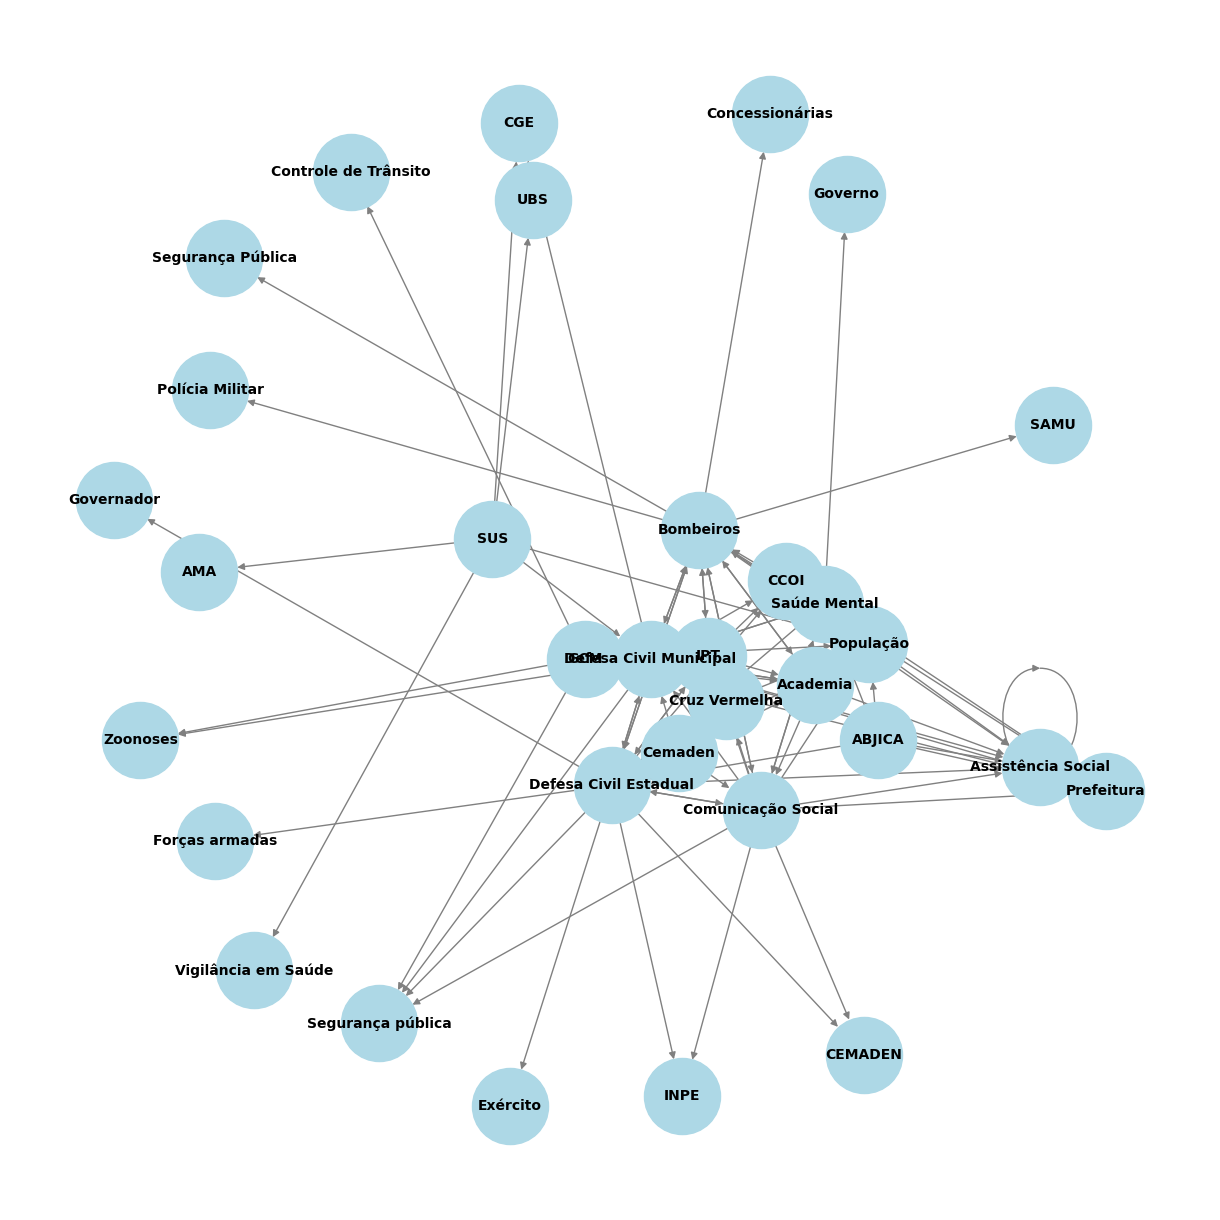

In [11]:
# Gerando as posições dos nós usando o layout spring
pos = nx.spring_layout(G)

# Criando o grafo interativo com Plotly
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=1, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=20,
        colorbar=dict(
            thickness=15,
            title='Centralidade',
            xanchor='left',
            titleside='right'
        )
    )
)

# Adicionando as informações de hover com base nos dados do DataFrame
node_text = []
for node in G.nodes():
    node_info = f"{node}<br>Grau: {degree[node]}<br>Grau de Entrada: {in_degree[node]}<br>Grau de Saída: {out_degree[node]}"
    node_text.append(node_info)

node_trace.text = node_text

# Criando a figura interativa
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Grafo de Conexões entre Entidades',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=0, l=0, r=0, t=0),
                    annotations=[dict(
                        text=f"Total de Conexões: {total_conexoes}",
                        showarrow=False,
                        xref="paper", yref="paper",
                        x=0.005, y=0.005
                    )],
                    xaxis=dict(showgrid=False, zeroline=False),
                    yaxis=dict(showgrid=False, zeroline=False))
                )

fig.show()

# Desenha o grafo
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight='bold', edge_color='gray')
plt.show()
